In [ ]:
# this program demonstrates a damping oscillator 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [12]:
m=0.1
k=0.4
u=0.002
g=9.8
w=np.sqrt(k/m)

In [13]:
def f(t,X):
    return [X[1], -k/m*X[0]+u*m*g/m*(-1 if X[1]>1e-6 else 1)]

In [14]:
ans=sp.integrate.solve_ivp(f,(0,20),[0.1,0],dense_output=True)

In [15]:
t=np.linspace(0,20,5000)

In [16]:
y=ans.sol(t)
y.shape

(2, 5000)

In [17]:
dt=t[1]-t[0]
a=(y[1,1:]-y[1,:-1])/dt

In [18]:
a.shape

(4999,)

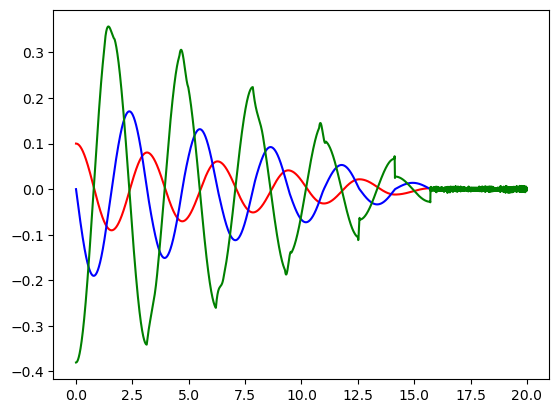

In [19]:
plt.plot(t,y[0],'r-')
plt.plot(t,y[1],'b-')
plt.plot(t[:-1],a,'g-')

In [20]:
sm=sp.interpolate.make_smoothing_spline(t,y[1])

In [21]:
smD=sm.derivative()

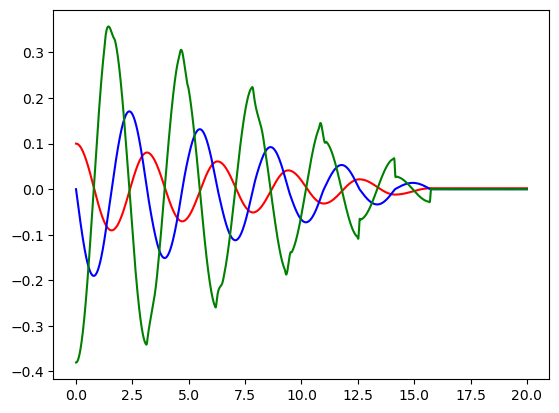

In [22]:
plt.plot(t,y[0],'r-')
plt.plot(t,sm(t),'b-')
plt.plot(t,smD(t),'g-')